In [2]:
%matplotlib inline

In [3]:
from __future__ import division
import pandas as pd
pd.set_option('display.mpl_style', 'default') # Make the graphs a bit prettier
from collections import OrderedDict
from scipy.stats import norm
Z = norm.ppf
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
np.random.seed(sum(map(ord, "categorical")))

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2885: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

  exec(code_obj, self.user_global_ns, self.user_ns)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [4]:
import os
from os.path import expanduser

In [5]:
homeDirectory = expanduser("~")
dataDirectory = homeDirectory + os.sep + 'vwmtest/data/'

In [6]:
dataSheets = [dataDirectory + 'vwm_run_2016_Jun_28_1712.csv', dataDirectory + 'vwm_run_2016_Jun_28_1732.csv', 
dataDirectory + 'vwm_run_2016_Jun_28_1752.csv', dataDirectory + 'vwm_run_2016_Jun_28_1704.csv', dataDirectory + 'vwm_run_2016_Jun_28_1725.csv', 
dataDirectory + 'vwm_run_2016_Jun_28_1743.csv']

In [7]:
testRuns = [1, 2, 3, 4, 5, 6]

In [8]:
conds = OrderedDict([('t2d0', (2, 0)), ('t2d2', (2, 2)), ('t2d4', (2, 4)), ('t4d0', (4, 0)), ('t4d2', (4, 2)), ('t4d4', (4, 4))])

In [9]:
# counts number of trials corresponding to inputted conditions
def itemCounter(df, responseType, changeType, t, d):
    count = float(len(df[responseType & changeType & t & d]))
    return count

In [10]:
# calculates K pased on Pashler equation: K = S * ((H - F) / (1 - F))
def kCalculation(s, h, f):
    k = s * ((h - f) / (1 - f))
    return k

In [11]:
def pashlerK(csv):
    # read in csv file
    df = pd.read_csv(csv)

    # create conditions
    resps = df['Response'] == 1
    noResps = df['Response'] == 0
    changes = df['ChangeTrial'] == 1
    noChanges = df['ChangeTrial'] == 0
    targ2 = df['nTargets'] == 2
    targ4 = df['nTargets'] == 4
    dist0 = df['nDistractors'] == 0
    dist2 = df['nDistractors'] == 2
    dist4 = df['nDistractors'] == 4

    # initialize dictionaries
    hitRates = OrderedDict()
    fAlarmRates = OrderedDict()
    Kvals = OrderedDict()
    
    conds = OrderedDict([('t2d0', (targ2, dist0)), ('t2d2', (targ2, dist2)), ('t2d4', (targ2, dist4)), ('t4d0', (targ4, dist0)), ('t4d2', (targ4, dist2)), ('t4d4', (targ4, dist4))])

    # store rate values
    for key in conds:
        hits = itemCounter(df, resps, changes, conds[key][0], conds[key][1])
        misses = itemCounter(df, noResps, changes, conds[key][0], conds[key][1])
        falarms = itemCounter(df, resps, noChanges, conds[key][0], conds[key][1])
        crejects = itemCounter(df, noResps, noChanges, conds[key][0], conds[key][1])
        hitRates[key] = hits/(hits+misses)
        fAlarmRates[key] = falarms/(falarms+crejects)
        s = 0
        if key == 't2d0' or key == 't2d2' or key == 't2d4':
            s = 2
        else:
            s = 4
        Kvals[key] = kCalculation(s, hitRates[key], fAlarmRates[key])
    return {'Kvals': Kvals, 'hitRates': hitRates, 'fAlarmRates': fAlarmRates}

In [12]:
def rtCalc(csv):
    # read in csv file
    df = pd.read_csv(csv)

    # create conditions
    resps = df['Response'] == 1
    targ2 = df['nTargets'] == 2
    targ4 = df['nTargets'] == 4
    dist0 = df['nDistractors'] == 0
    dist2 = df['nDistractors'] == 2
    dist4 = df['nDistractors'] == 4

    # initialize dictionary
    RTRates = OrderedDict()
    conds = OrderedDict([('t2d0', (targ2, dist0)), ('t2d2', (targ2, dist2)), ('t2d4', (targ2, dist4)), ('t4d0', (targ4, dist0)), ('t4d2', (targ4, dist2)), ('t4d4', (targ4, dist4))])

    # calculate average RT value
    for key in conds:
        rows = df[conds[key][0] & conds[key][1] & resps]
        rts = rows['RT']
        meanRT = rts.mean()
        RTRates[key] = meanRT
    return RTRates

In [13]:
def dprime(csv):
     # read in csv file
    df = pd.read_csv(csv)
    
    # create conditions
    resps = df['Response'] == 1
    noResps = df['Response'] == 0
    changes = df['ChangeTrial'] == 1
    noChanges = df['ChangeTrial'] == 0
    targ2 = df['nTargets'] == 2
    targ4 = df['nTargets'] == 4
    dist0 = df['nDistractors'] == 0
    dist2 = df['nDistractors'] == 2
    dist4 = df['nDistractors'] == 4
    
    # initialize dict
    hits = OrderedDict()
    misses = OrderedDict()
    falarms = OrderedDict()
    crejects = OrderedDict()
    dprimes = OrderedDict()
      
    conds = OrderedDict([('t2d0', (targ2, dist0)), ('t2d2', (targ2, dist2)), ('t2d4', (targ2, dist4)), ('t4d0', (targ4, dist0)), ('t4d2', (targ4, dist2)), ('t4d4', (targ4, dist4))])

    # calculate d-primes for each condition
    for key in conds:   
        hits = itemCounter(df, resps, changes, conds[key][0], conds[key][1])
        misses = itemCounter(df, noResps, changes, conds[key][0], conds[key][1])
        falarms = itemCounter(df, resps, noChanges, conds[key][0], conds[key][1])
        crejects = itemCounter(df, noResps, noChanges, conds[key][0], conds[key][1])
        
        # Floors an ceilings are replaced by half hits and half FA's
        halfHit = 0.5/(hits+misses)
        halfFa = 0.5/(falarms+crejects)
 
        # Calculate hitrate and avoid d' infinity
        hitRate = hits/(hits+misses)
        if hitRate == 1: hitRate = 1-halfHit
        if hitRate == 0: hitRate = halfHit

        # Calculate false alarm rate and avoid d' infinity
        faRate = falarms/(falarms+crejects)
        if faRate == 1: faRate = 1-halfFa
        if faRate == 0: faRate = halfFa
        
        # calculate dprime using Z (ppf function in scipy.norm)
        dprimes[key]= Z(hitRate) - Z(faRate)
    
    return dprimes

In [14]:
Kvals = []
hitRates = []
faRates = []

for sheet in dataSheets:
    Kvals.append(pashlerK(sheet)['Kvals'])
    hitRates.append(pashlerK(sheet)['hitRates'])
    faRates.append(pashlerK(sheet)['fAlarmRates'])

In [15]:
Kchart = pd.DataFrame(Kvals, index=testRuns, columns=conds.keys())
Kchart

,t2d0,t2d2,t2d4,t4d0,t4d2,t4d4
1,1.909091,1.958333,1.818182,2.400000,1.904762,3.000000
2,1.909091,1.833333,2.000000,3.200000,2.146341,2.500000
3,2.000000,2.000000,2.000000,2.400000,2.731707,1.818182
4,1.904762,1.909091,2.000000,2.800000,2.871795,3.272727
5,1.818182,1.782609,2.000000,3.333333,3.567568,2.727273
6,1.909091,1.787234,1.714286,3.360000,2.974359,2.166667


In [16]:
hitChart = pd.DataFrame(hitRates, index=testRuns, columns=conds.keys())
hitChart

,t2d0,t2d2,t2d4,t4d0,t4d2,t4d4
1,0.954545,0.979167,0.909091,0.60,0.476190,0.76
2,0.954545,0.916667,1.000000,0.80,0.547619,0.64
3,1.000000,1.000000,1.000000,0.60,0.690476,0.52
4,0.954545,0.958333,1.000000,0.76,0.738095,0.84
5,0.909091,0.895833,1.000000,0.84,0.904762,0.72
6,0.954545,0.895833,0.863636,0.84,0.761905,0.56


In [17]:
faChart = pd.DataFrame(faRates, index=testRuns, columns=conds.keys())
faChart

,t2d0,t2d2,t2d4,t4d0,t4d2,t4d4
1,0.000000,0.000000,0.000000,0.00,0.000000,0.04
2,0.000000,0.000000,0.000000,0.00,0.023810,0.04
3,0.000000,0.000000,0.000000,0.00,0.023810,0.12
4,0.045455,0.083333,0.000000,0.20,0.071429,0.12
5,0.000000,0.041667,0.045455,0.04,0.119048,0.12
6,0.000000,0.020833,0.045455,0.00,0.071429,0.04


In [18]:
kMeans = []
kMeanArray = ["K Value Mean"]
hitMeans = []
hitMeanArray = ["Hit Rate Mean"]
faMeans = []
faMeanArray = ["FA Rate Mean"]

for key in conds:
    kMeans.append(Kchart[key].mean())
    hitMeans.append(hitChart[key].mean())
    faMeans.append(faChart[key].mean())

In [19]:
kMeanChart = pd.DataFrame(kMeans, index=conds.keys(), columns=kMeanArray)
kMeanChart

,K Value Mean
t2d0,1.908369
t2d2,1.878433
t2d4,1.922078
t4d0,2.915556
t4d2,2.699422
t4d4,2.580808


In [20]:
hitMeanChart = pd.DataFrame(hitMeans, index=conds.keys(), columns=hitMeanArray)
hitMeanChart

,Hit Rate Mean
t2d0,0.954545
t2d2,0.940972
t2d4,0.962121
t4d0,0.740000
t4d2,0.686508
t4d4,0.673333


In [21]:
faMeanChart = pd.DataFrame(faMeans, index=conds.keys(), columns=faMeanArray)
faMeanChart

,FA Rate Mean
t2d0,0.007576
t2d2,0.024306
t2d4,0.015152
t4d0,0.040000
t4d2,0.051587
t4d4,0.080000


In [22]:
RTvals = []

for sheet in dataSheets:
    RTvals.append(rtCalc(sheet))

RTchart = pd.DataFrame(RTvals, index=testRuns, columns=conds.keys())
RTchart

,t2d0,t2d2,t2d4,t4d0,t4d2,t4d4
1,0.498757,0.535168,0.551928,0.569245,0.601819,0.623149
2,0.459129,0.485972,0.550016,0.557587,0.551842,0.604494
3,0.449602,0.455398,0.480022,0.517446,0.524867,0.549347
4,0.518111,0.522284,0.552190,0.537068,0.575770,0.562096
5,0.546223,0.538182,0.595899,0.575776,0.586120,0.608632
6,0.541096,0.573445,0.606490,0.589601,0.635381,0.584782


In [23]:
rtMeanArray = ["RT Mean"]

rtMeans = []

for key in conds:
    rtMeans.append(RTchart[key].mean())
    
rtMeanChart = pd.DataFrame(rtMeans, index=conds.keys(), columns=rtMeanArray)
rtMeanChart

,RT Mean
t2d0,0.502153
t2d2,0.518408
t2d4,0.556091
t4d0,0.557787
t4d2,0.579300
t4d4,0.588750


In [24]:
dPrimes = []

for sheet in dataSheets:
    dPrimes.append(dprime(sheet))

dpChart = pd.DataFrame(dPrimes, index=testRuns, columns=conds.keys())
dpChart

,t2d0,t2d2,t2d4,t4d0,t4d2,t4d4
1,3.691045,4.347825,3.335601,2.307096,2.200472,2.456989
2,3.691045,3.693985,4.000847,2.895370,2.100401,2.109145
3,4.000847,4.621983,4.000847,2.307096,2.477953,1.225140
4,3.381243,3.114659,4.000847,1.547924,2.102718,2.169445
5,3.335601,2.989826,3.691045,2.745144,2.488933,1.757828
6,3.691045,3.294996,2.787425,3.048207,2.177677,1.901655


In [25]:
dpMeanArray = ["d' Mean"]

dpMeans = []

for key in conds:
    dpMeans.append(dpChart[key].mean())
    
dpMeanChart = pd.DataFrame(dpMeans, index=conds.keys(), columns=dpMeanArray)
dpMeanChart

,d' Mean
t2d0,3.631805
t2d2,3.677212
t2d4,3.636102
t4d0,2.475139
t4d2,2.258025
t4d4,1.936700


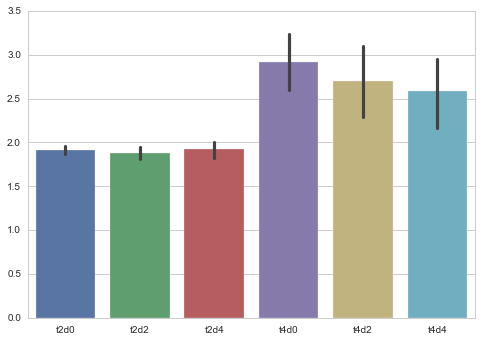

In [26]:
sns.barplot(data=Kchart)

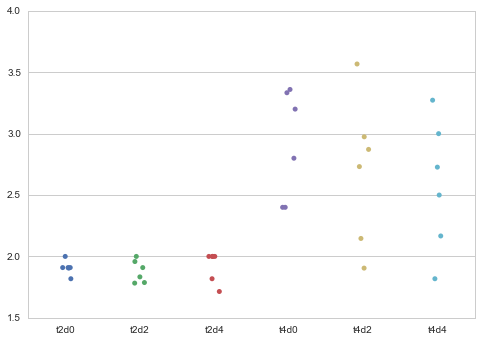

In [27]:
sns.stripplot(data=Kchart, jitter=True)

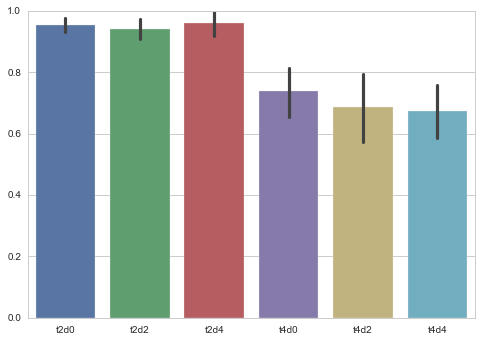

In [28]:
sns.barplot(data = hitChart)

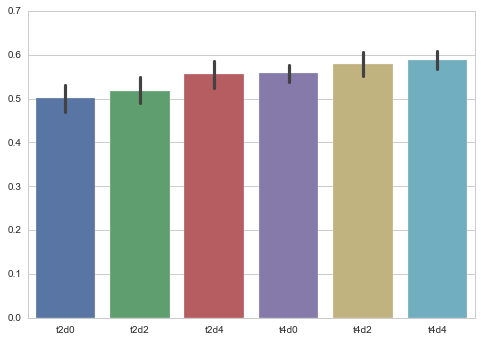

In [29]:
sns.barplot(data = RTchart)

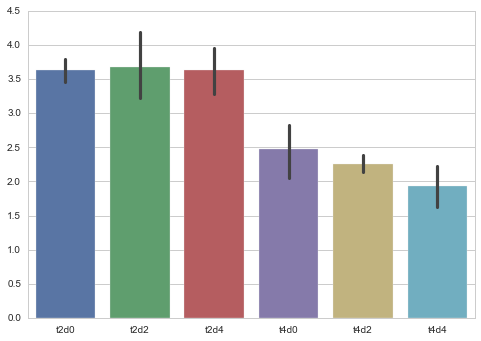

In [30]:
sns.barplot(data = dpChart)